# Analysis of Cascade Refrigeration System using CoolProp

## Introduction
 ⠀다단 압축 냉동 사이클에서 일반 냉매의 경우 -70℃ 이하의 증발 온도일 때 냉매 증기의 비체적이 상당히 커 냉매 증기를 흡입하는 압축기에 무리가 따른다. 이에 따라 -70℃이하의 온도를 얻기 위해서는 2단압축 또는 다단 압축방식으로는 한계가 있다. 이러한 문제를 해결하고자 High-Stage Refrigeration Cycle과 Low-Stage Refrigeration Cycle로 나누어 -70℃ 이하의 온도를 얻어내는 방식의 System을 Cascade Refrigeration System이라고 한다.

In [1]:
from numpy import shape as size
from matplotlib import pyplot as plt
from CoolProp import CoolProp as CP
from CoolProp.Plots import PropertyPlot as CPP
from CoolProp.Plots import SimpleCompressionCycle as CPPSCC
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

#### High-Stage
- Refrigerant: R1234yf (ODP: 0, GWP: 4)
- Evaporation Temperature = -20℃
- Condensation Temperature = 40℃
- Superheating Degree = 5℃
- Subcooled Degree = 5℃

- Compressor Efficiency = 80%

In [2]:
# High Stage setting
High_refrant = "R1234yf" # Refrigerant
T_evap_h = -40 # Evaporation Temperature
T_con_h = 40 # Condensatin Temperature
T_super_h = 5 # Superheating degree
T_sub_h = 5 # Subcooled degree
K_cv = 273.15 # Temperature Convert

eta_ch = 0.8 # Compression Efficiency

Te_abs_h = T_evap_h + K_cv # Convert to Evapration Absolute Temperature (Celsius -> Kelvin)
Tc_abs_h = T_con_h + K_cv # Convert to Condensation Absolute Temperature (Celsius -> Kelvin)

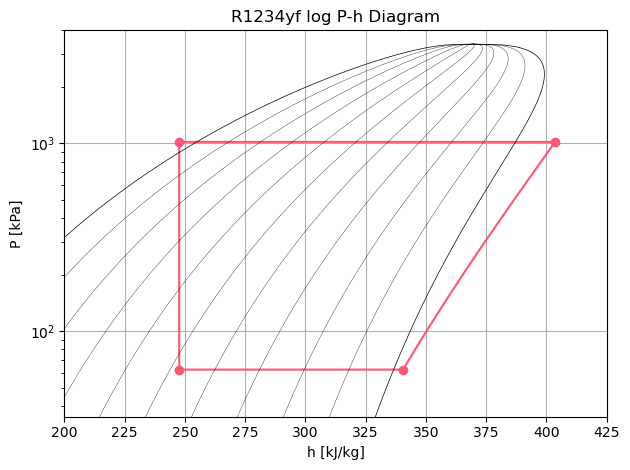

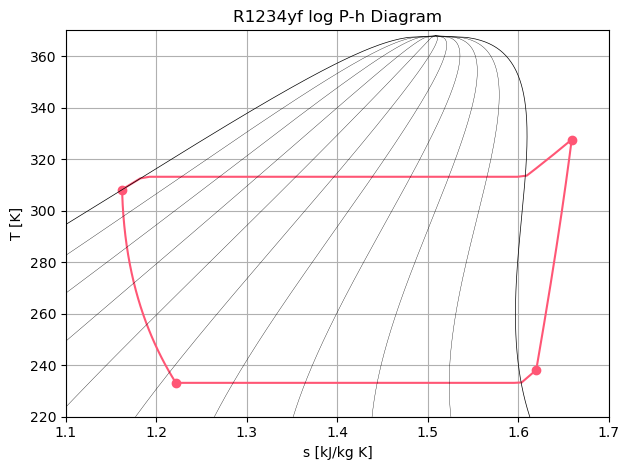

Stored State Points:
state        T (K)      p (kPa)    d (kg/m3)    h (kJ/kg)  s (kJ/kg/K)
    0      238.150       62.370        3.705      340.489        1.620
    1      327.595     1018.367       52.279      403.612        1.659
    2      308.150     1018.367     1055.101      247.620        1.162
    3      233.151       62.370        7.271      247.620        1.222



In [8]:
# Design of High-stage Refrigeration Cycle
pp_h = CPP(High_refrant, "PH", unit_system = "KSI")
pp_h.set_axis_limits([200, 425, 35, 4000])
pp_h.title(f"{High_refrant} log P-h Diagram")
pp_h.xlabel('h [kJ/kg]')
pp_h.ylabel('P [kPa]')
pp_h.calc_isolines(CP.iQ, num = 11)


pp_h.state.update(CP.QT_INPUTS, 1.0,  Te_abs_h+0.001)
p_evap_h = pp_h.state.keyed_output(CP.iP) # Calculation of Evaporation Pressure
pp_h.state.update(CP.QT_INPUTS, 0.1, Tc_abs_h-0.001)
p_con_h = pp_h.state.keyed_output(CP.iP) # Calculation of Condensation Pressure

T_suction_h = Te_abs_h + T_super_h # Suction Temperature of Compressor
T_exp_in_h = Tc_abs_h - T_sub_h # Inlet Temperature of Expasion Vavle

cycle_h = CPPSCC(High_refrant, "PH", unit_system = "KSI") # Drawing P-h Diagram
cycle_h.simple_solve(T_suction_h, p_evap_h, T_exp_in_h, p_con_h, eta_ch, SI=True)
cycle_h.steps = 50
sc_h = cycle_h.get_state_changes()
pp_h.draw_process(sc_h, line_opts = {'color':'#FF5675', 'lw':1.5})
pp_h.grid()

plt.close(cycle_h.figure)
pp_h.show()

pp_h = CPP(High_refrant, "TS", unit_system = "KSI") # Drawing T-s Diagram
pp_h.set_axis_limits([1.1, 1.7, 220, 370])
pp_h.title(f"{High_refrant} log P-h Diagram")
pp_h.xlabel('s [kJ/kg K]')
pp_h.ylabel('T [K]')
pp_h.calc_isolines(CP.iQ, num = 11)

cycle_h = CPPSCC(High_refrant, "TS", unit_system = "KSI")
cycle_h.simple_solve(T_suction_h, p_evap_h, T_exp_in_h, p_con_h, eta_ch, SI=True)
cycle_h.steps = 50
sc_h = cycle_h.get_state_changes()
pp_h.draw_process(sc_h, line_opts = {'color':'#FF5675', 'lw':1.5})
pp_h.grid()

plt.close(cycle_h.figure)
pp_h.show()

print(cycle_h._cycle_states)

In [4]:
# Calculation of High-stage cycle property(Enthalpy, Pressure)
list_enthalpy_h = []
for i in range(4):
    list_enthalpy_h.append(cycle_h._cycle_states[i, 'H'])
    print(f"Enthalpy{i}: {round((list_enthalpy_h[i])/1000, 2)} [kJ/kg]")
print()

list_pressure_h = []
for j in range(4):
    list_pressure_h.append(cycle_h._cycle_states[j, 'P'])
    print(f"Pressure{j}: {round((list_pressure_h[j])/1000, 2)} [kJ/kg]")

Enthalpy0: 340.49 [kJ/kg]
Enthalpy1: 403.61 [kJ/kg]
Enthalpy2: 247.62 [kJ/kg]
Enthalpy3: 247.62 [kJ/kg]

Pressure0: 62.37 [kJ/kg]
Pressure1: 1018.37 [kJ/kg]
Pressure2: 1018.37 [kJ/kg]
Pressure3: 62.37 [kJ/kg]


#### Low-Stage
- Refrigerant: R1150 (ODP: 0, GWP: 3.7)
- Evaporation Temperature = -80℃
- Cascade Heatexchanger Temperature Difference: 10℃ (High-Stage Evaporation Temperature: -40℃)
- Superheating Degree = 5℃
- Subcooled Degree = 5℃

- Compressor Efficiency = 80%

In [5]:
# Low Stage setting
Low_refrant = "R1150" # Low-Stage Refrigerant
T_evap_l = -80 # Low-Stage Evaporation Temperature
HX_cas_dt = 10 # Cascade Heatexchanger Temperature
T_con_l = T_evap_h + HX_cas_dt # calculation of Low-Stage Condensation Temperature
T_super_l = 5 # Low-stage Superheating degree
T_sub_l = 5 # Low-Stage Subcooling degree
eta_cl = 0.8

Te_abs_l = T_evap_l + K_cv # Convert to Evaporation Absolute Temperature (Celsius -> Kelvin)
Tc_abs_l = T_con_l + K_cv # Convert to Condensation Absolute Temperature (Celsius -> Kelvin)

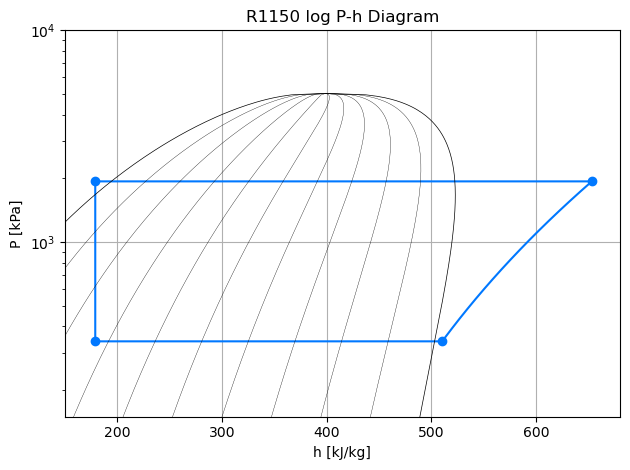

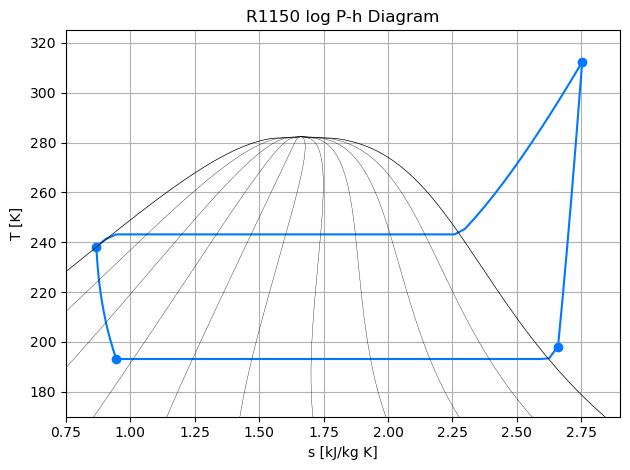

Stored State Points:
state        T (K)      p (kPa)    d (kg/m3)    h (kJ/kg)  s (kJ/kg/K)
    0      198.150      340.359        6.241      510.317        2.659
    1      312.314     1936.513       23.256      653.116        2.753
    2      238.150     1936.513      451.252      179.207        0.866
    3      193.151      340.359       22.993      179.207        0.946



In [6]:
# Design of Low-stage Refrigeration Cycle
pp_l = CPP(Low_refrant, "PH", unit_system = "KSI")
pp_l.set_axis_limits([150, 680, 150, 10000])
pp_l.title(f"{Low_refrant} log P-h Diagram")
pp_l.xlabel('h [kJ/kg]')
pp_l.ylabel('P [kPa]')
pp_l.calc_isolines(CP.iQ, num = 11)

pp_l.state.update(CP.QT_INPUTS, 1.0,  Te_abs_l+0.001)
p_evap_l = pp_l.state.keyed_output(CP.iP) # Calculation of Evaporation Pressure
pp_l.state.update(CP.QT_INPUTS, 0.1, Tc_abs_l-0.001)
p_con_l = pp_l.state.keyed_output(CP.iP) # Calculation of Condensation Pressure

T_suction_l = Te_abs_l + T_super_l # Suction Temperature of Compressor
T_exp_in_l = Tc_abs_l - T_sub_l # Inlet Temperature of Expasion Vavle

cycle_l = CPPSCC(Low_refrant, "PH", unit_system = "KSI") # Drawing P-h diagram
cycle_l.simple_solve(T_suction_l, p_evap_l, T_exp_in_l, p_con_l, eta_cl, SI=True)
cycle_l.steps = 50
sc_l = cycle_l.get_state_changes()
pp_l.draw_process(sc_l, line_opts = {'color':'#0078FF', 'lw':1.5})
pp_l.grid()
plt.close(cycle_l.figure)
pp_l.show()

pp_l = CPP(Low_refrant, "TS", unit_system = "KSI") # Drawing T-s diagram
pp_l.set_axis_limits([0.75, 2.9, 170, 325])
pp_l.title(f"{Low_refrant} log P-h Diagram")
pp_l.xlabel('s [kJ/kg K]')
pp_l.ylabel('T [K]')
pp_l.calc_isolines(CP.iQ, num = 11)

cycle_l = CPPSCC(Low_refrant, "TS", unit_system = "KSI")
cycle_l.simple_solve(T_suction_l, p_evap_l, T_exp_in_l, p_con_l, eta_cl, SI=True)
cycle_l.steps = 50
sc_l = cycle_l.get_state_changes()
pp_l.draw_process(sc_l, line_opts = {'color':'#0078FF', 'lw':1.5})
pp_l.grid()
plt.close(cycle_l.figure)
pp_l.show()

print(cycle_l._cycle_states)

In [7]:
# Calculation of Low-stage cycle property(Enthalpy, Pressure)
list_enthalpy_l = []
for i in range(4):
    list_enthalpy_l.append(cycle_l._cycle_states[i, 'H'])
    print(f"Enthalpy{i}: {round((list_enthalpy_l[i])/1000, 2)} [kJ/kg]")
print()
    
list_pressure_l = []
for j in range(4):
    list_pressure_l.append(cycle_l._cycle_states[j, 'P'])
    print(f"Pressure{j}: {round((list_pressure_l[j]/1000), 2)} [kJ/kg]")

Enthalpy0: 510.32 [kJ/kg]
Enthalpy1: 653.12 [kJ/kg]
Enthalpy2: 179.21 [kJ/kg]
Enthalpy3: 179.21 [kJ/kg]

Pressure0: 340.36 [kJ/kg]
Pressure1: 1936.51 [kJ/kg]
Pressure2: 1936.51 [kJ/kg]
Pressure3: 340.36 [kJ/kg]
